# Qiskit 2 Fundamentals Lab

Welcome to the Qiskit 2 Fundamentals Lab! This notebook is designed to help get up to speed on Qiskit 2 fundamentals by providing hands-on exercises for 10 core concepts.

**Instructions:**
1. Read the explanation for each concept.
2. Complete the coding exercise in the designated cell.


## Setup

First, let's install and import the necessary libraries. Run the cell below.

In [1]:
!pip install qiskit[visualization] qiskit-ibm-runtime qiskit-aer qiskit_qasm3_import

import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import Pauli, SparsePauliOp, Statevector
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit_aer import AerSimulator
from qiskit.circuit import Parameter, ParameterVector
import qiskit.qasm3
from qiskit_ibm_runtime.fake_provider import FakeVigoV2
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import SamplerV2 as Sampler, EstimatorV2 as Estimator, QiskitRuntimeService


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 105.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.4/377.4 kB 28.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 541.5/541.5 kB 35.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 112.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 83.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 7.5 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=ee60d1a58b87490862e513c1d328af48508e3cbc10de3f870cc62b2cfe4fa93c
  Stored i

---

**bold text**## 1. Pauli Operators (Single-Qubit Operators)

**Explanation:** The Pauli operators (X, Y, Z, and I) are 2x2 matrices that represent fundamental single-qubit quantum operations. In Qiskit, these can be created using the `Pauli` class (e.g., `Pauli('X')` for the X operator). You can also construct multi-qubit Paulis by specifying characters for each qubit (e.g., `'XI'` for identity on qubit 0 and X on qubit 1, following Qiskit's little-endian bit ordering).

**Exercise 1:**
Write code that performs following functionality:
1. Creates a 3-qubit Pauli operator representing `Z` on qubit 2, `Y` on qubit 1, and `I` (Identity) on qubit 0.
2. Prints the operator.
3. Prints its corresponding matrix representation

In [4]:
p = Pauli('ZYI')
# IN ENDING THE I IS THE 0 QUIBIT
print("Pauli operator:", p)
print(p.to_matrix())
print()

Pauli operator: ZYI
[[0.+0.j 0.+0.j 0.-1.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.-1.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+1.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+1.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+1.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+1.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.-1.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.-1.j 0.+0.j 0.+0.j]]



---

## 2. Single-Qubit Gates and Phases

**Explanation:** Single-qubit gates like X, Y, Z, H, S, and T are basic operations on one qubit. S and T are phase gates. The S-gate adds a π/2 phase to the |1⟩ component of any quantum state, while the T-gate adds a π/4 phase to the |1⟩ component, leaving the |0⟩ component unchanged in both cases. These phase shifts are crucial for many quantum algorithms.

**Exercise 2:**
Write code that performs following functionality:
1. Creates a quantum circuit that contains one qubit.
2. Puts the qubit in the state |1⟩.
3. Adds a single gate to the circuit that applies a π/4 phase shift to the qubit.
4. Output a Dirac notation representation of the circuit's statevector.

In [7]:
q = QuantumCircuit(1)
# made circuit of one bit
q.x(0)
q.t(0)

statevector = Statevector(q)

print("in dirac notation....");

statevector.draw('latex')



in dirac notation....


<IPython.core.display.Latex object>

---

## 3. Superposition and Bloch Sphere Rotations

**Explanation:** Gates like `RX`, `RY`, and `RZ` perform rotations around the axes of the Bloch sphere, creating superposition states. A rotation by an angle θ around the Y-axis (`RY(θ)`) on an initial state |0⟩ produces the superposition cos(θ/2)|0⟩ + sin(θ/2)|1⟩. The probabilities of measuring 0 or 1 are the squares of these amplitudes.

**Exercise 3:**
Write code that performs following functionality:
1. Creates a quantum circuit that contains one qubit.
2. Applies a single gate to qubit 0 (initially in state |0⟩) to create a superposition where the probability of measuring |0⟩ is approximately 14.6% and the probability of measuring |1⟩ is 85.4%.
3. Prints the probabilities.
4. Displays a Bloch sphere representation of the statevector.

In [8]:
q = QuantumCircuit(1);

theta = 2*np.arccos(np.sqrt(0.146));
q.ry(theta,0);

statevector = Statevector(q);

probs = statevector.probabilities()

print(f"Probability of |0⟩: {probs[0]:.3f} ({probs[0]*100:.1f}%)")
print(f"Probability of |1⟩: {probs[1]:.3f} ({probs[1]*100:.1f}%)")


Probability of |0⟩: 0.146 (14.6%)
Probability of |1⟩: 0.854 (85.4%)


---

## 4. Multi-Qubit Operations and Entanglement

**Explanation:** Multi-qubit gates like the CNOT (`qc.cx(control, target)`) create entanglement when applied to superposition states. A common entangled state is the Bell state |Φ+⟩ = 1/√2(|00⟩ + |11⟩), created by applying a Hadamard gate to one qubit and then a CNOT gate. Remember Qiskit's bit ordering: qubit 0 is the rightmost bit (least significant).

**Exercise 4:**
Write code that performs following functionality:
1. Creates a quantum circuit that contains two qubits.
2. Create the Bell state |Φ+⟩ in which the first qubit (q0) is the control qubit.
3. Draws the quantum circuit using matplotlib.
4. Prints the circuit's statevector.

circuit creatred using q.draw('mpl') to visulaize


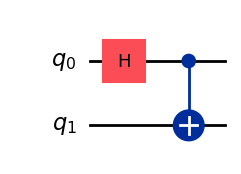

the statevector is: 
Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


In [19]:
import matplotlib.pyplot as plt
q = QuantumCircuit(2);
q.h(0);
q.cx(0,1);
print(f"circuit creatred using q.draw('mpl') to visulaize")
fig = q.draw(output='mpl');
display(fig);
statevector = Statevector(q)
print(f"the statevector is: ");
print(statevector);
# print();


---

## 5. Building Quantum Circuits and Drawing

**Explanation:** The `QuantumCircuit` class is used to build circuits. The `draw()` method provides visualizations in formats like `'text'`, `'mpl'`, and `'latex'`. You can customize the drawing with parameters such as `reverse_bits` to flip the qubit order.

**Exercise 5:**
Write code that performs following functionality:
1. Creates a 3-qubit GHZ state.
2. Draws the circuit with the qubit order reversed in the diagram (q2 on top, q0 on bottom).


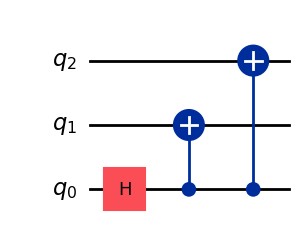

In [25]:
q= QuantumCircuit(3)
q.h(0);
q.cx(0,1);
q.cx(0,2);
fig= q.draw(output='mpl', reverse_bits=True)
display(fig)

---

## 6. Dynamic Circuits and Classical Control Flow

**Explanation:** Qiskit supports dynamic circuits where operations can be conditioned on classical measurement outcomes. The `if_test()` context manager can be used to create conditional blocks where operations are executed based on classical bit values. This allows for powerful classical feed-forward in your quantum programs.

**Exercise 6:**
Write code that performs following functionality:
1. Creates a quantum circuit that contains two qubits and at least one classical bit.
2. Adds a hadamard gate to the least significant qubit
3. Applies an X gate to qubit 1 *only if* a measurement of qubit 0 yields the result `1`. Use the `if_test()` context manager with the appropriate condition tuple.
4. Draws the circuit using matplotlib.

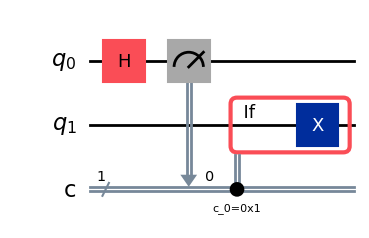

In [31]:
q= QuantumCircuit(2,1);

q.h(0);
q.measure(0,0);
with q.if_test((q.clbits[0],1)):
  q.x(1)

fig = q.draw(output='mpl')
display(fig)

---

## 7. Visualizing Quantum States and Results

**Explanation:** Qiskit offers several functions to visualize results. `plot_histogram(counts)` is used to display measurement outcomes from a simulation or real device run. You can sort the results for easier analysis, for example, by the frequency of the outcomes.

**Exercise 7:**
Write code that performs following functionality:
1. Creates a quantum circuit that contains the |Φ+⟩ Bell state.
2. Measures the results on classical wires.
3. Runs the circuit using the `AerSimulator`.
4. Gets the measurement counts.
5. Plots a histogram with the bars sorted from the most common outcome to the least common.

In [38]:
from qiskit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
import matplotlib.pyplot as plt

qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)

qc.measure([0, 1], [0, 1])

sim = AerSimulator()

result = sim.run(qc).result()

result = sim.run(q).result()

counts = result.get_counts()
print("Measurement counts:", counts)

plot_histogram(counts, sort='desc', title='Bell State Measurement')
plt.show()


Measurement counts: {'1': 509, '0': 515}


---

## 8. Parameterized Quantum Circuits

**Explanation:** Qiskit allows circuits with symbolic parameters using the `Parameter` class. These parameters act as placeholders that can be bound to specific numerical values later using the `assign_parameters()` method. This is fundamental for variational algorithms like VQE and QAOA.

**Exercise 8:**
Write code that performs following functionality:
1. Creates a `Parameter` instance to represent a parameter named `theta`.
2. Creates a quantum circuit `qc` that contains one qubit.
3. Adds an RX gate with parameter `theta` to the qubit wire.
4. Draws the `qc` circuit.
5. Creates a new circuit `bound_qc` by binding the parameter `theta` to the value `π/2`.
6. Draws the `bound_qc` circuit.

Circuit with parameter θ:


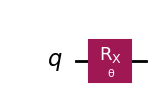

Circuit with θ = π/2:


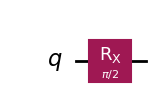

In [45]:
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
import numpy as np
import matplotlib.pyplot as plt

theta = Parameter('θ')

qc = QuantumCircuit(1)

qc.rx(theta, 0)

print("Circuit with parameter θ:")
fig=qc.draw(output='mpl')
display(fig);

bound_qc = qc.assign_parameters({theta: np.pi / 2})

print("Circuit with θ = π/2:")
fig=bound_qc.draw(output='mpl')
display(fig)


---

## 9. Circuit Transpilation and Optimization

**Explanation:** Transpilation adapts a quantum circuit to the constraints of a specific quantum device, including its basis gates and qubit connectivity. The `generate_preset_pass_manager()` function creates a transpilation pass manager with preset configurations. It has several `optimization_level` settings (0-3), where higher levels apply more advanced optimization techniques to reduce circuit depth and gate count, at the cost of longer compilation time.

**Exercise 9:**
Write code that performs following functionality:
1. Creates a 3-qubit GHZ circuit.
2. Transpiles the circuit for the `FakeVigoV2` backend, using the highest level of optimization (level 3).
3. Prints the depth of the original circuit.
4. Prints the depth of the transpiled circuit.
5. Draws the transpiled circuit.

Original circuit depth: 3
Transpiled circuit depth: 5


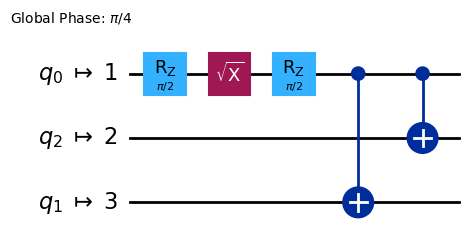

In [46]:
from qiskit import QuantumCircuit, transpile
from qiskit_ibm_runtime.fake_provider import FakeVigoV2
import matplotlib.pyplot as plt

qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0, 1)
qc.cx(0, 2)

backend = FakeVigoV2()

tqc = transpile(qc, backend=backend, optimization_level=3)

print("Original circuit depth:", qc.depth())
print("Transpiled circuit depth:", tqc.depth())

pic=tqc.draw('mpl')
display(pic);


---

## 10. Qiskit Runtime Execution Modes

**Explanation:** Qiskit Runtime offers three execution modes: **job**, **session**, and **batch**. The execution modes determine how your jobs are scheduled, and choosing the right execution mode allows your workload to run efficiently within your budget.

**Exercise 10:** This is a conceptual question. In the markdown cell below, explain which execution mode (job, session, or batch) you would use for a Variational Quantum Eigensolver (VQE) algorithm and briefly state why. And you guys dont know about VQE right now. Use a large language model to look into that question. This question is optional.

i would choose session mode